# Corso di Identificazione dei Modelli e Analisi dei Dati (IMAD) A.A. 2018/2019
## **Università degli Studi di Bergamo**

## =======================  Esercitazione 2: Classificazione ========================
**Autori**: Mirko Mazzoleni, Gabriele Maroni

## Import librerie

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

np.random.seed(0) # set random seed

C:\Anaconda3\envs\tensorflow3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Caricamento dati

In [2]:
#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

mnist = tf.keras.datasets.mnist

Shape of data Train: (60000, 28, 28)
Shape of data Test: (10000, 28, 28)


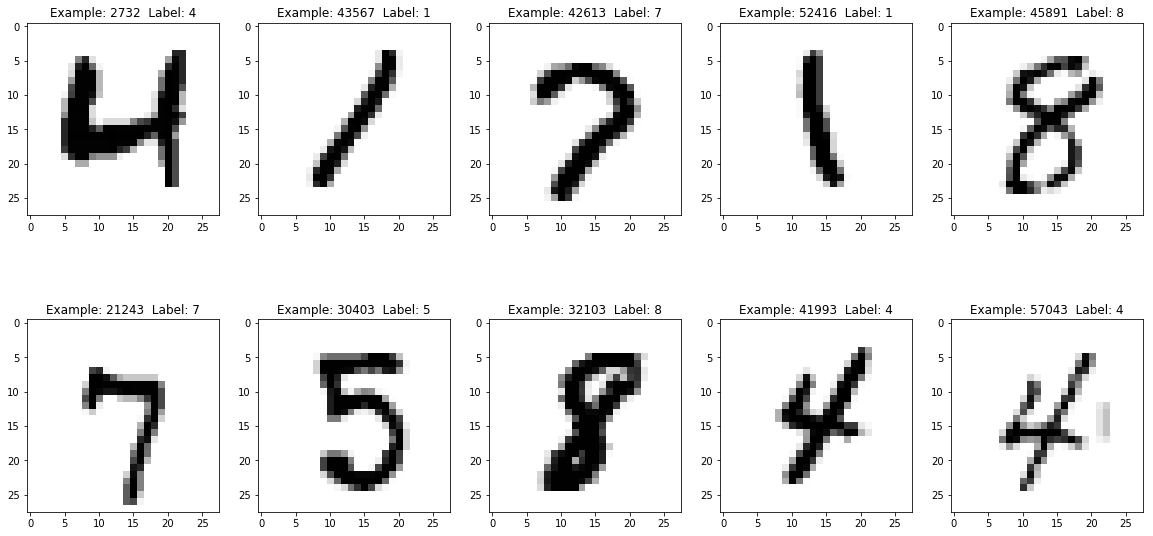

In [3]:
# define the train and the test datasets
(X_train_raw, y_train_raw),(X_test_raw, y_test_raw) = mnist.load_data()
print('Shape of data Train:', np.shape(X_train_raw))
print('Shape of data Test:', np.shape(X_test_raw))

np.random.seed(0) # set random seed
# Plot 10 random images
fig = plt.figure(0,figsize=(20, 10))
for i in np.arange(10):
    plt.subplot(2, 5, i+1)
    num = np.random.randint(0, X_train_raw.shape[0])
    plt.imshow(X_train_raw[num], cmap=plt.get_cmap('gray_r'))
    plt.title('Example: %d  Label: %d' % (num, y_train_raw[num]))
    

## Logistic regression

In [4]:
X_train_copy = X_train_raw
X_test_copy = X_test_raw
X_train = X_train_copy.reshape(X_train_raw.shape[0], 28*28) # Flatten the array
X_test = X_test_copy.reshape(X_test_raw.shape[0], 28*28) # Flatten the array
print('Shape of data for logistic regression:', np.shape(X_train))

# Making sure that the values are float so that we can get decimal points after division
Ntr = 10000 # number of train data
Nte = 5000 # number of test data
X_train = X_train.astype('float32')[0:Ntr] # select few samples
X_test = X_test.astype('float32')[0:Nte] # select few samples
y_train = y_train_raw[0:Ntr] # select few samples
y_test = y_test_raw[0:Nte] # select few samples

X_train /= 255 # Normalizing the RGB codes by dividing it to the max RGB value.
X_test /= 255 
print('Number of images in Train', X_train.shape[0])
print('Number of images in Test', X_test.shape[0])


Shape of data for logistic regression: (60000, 784)
Number of images in Train 10000
Number of images in Test 5000


In [5]:
model = LogisticRegression(penalty='l2', C = 1e9, n_jobs = -1, solver='lbfgs'); # define logistic regression
model.fit(X_train, y_train); # fit logistic regression

In [6]:
y_pred = model.predict(X_test) # predict class of images
acc_score = accuracy_score(y_test, y_pred) # compute classification accuracy
print("Accuracy score:", acc_score)

Accuracy score: 0.8314


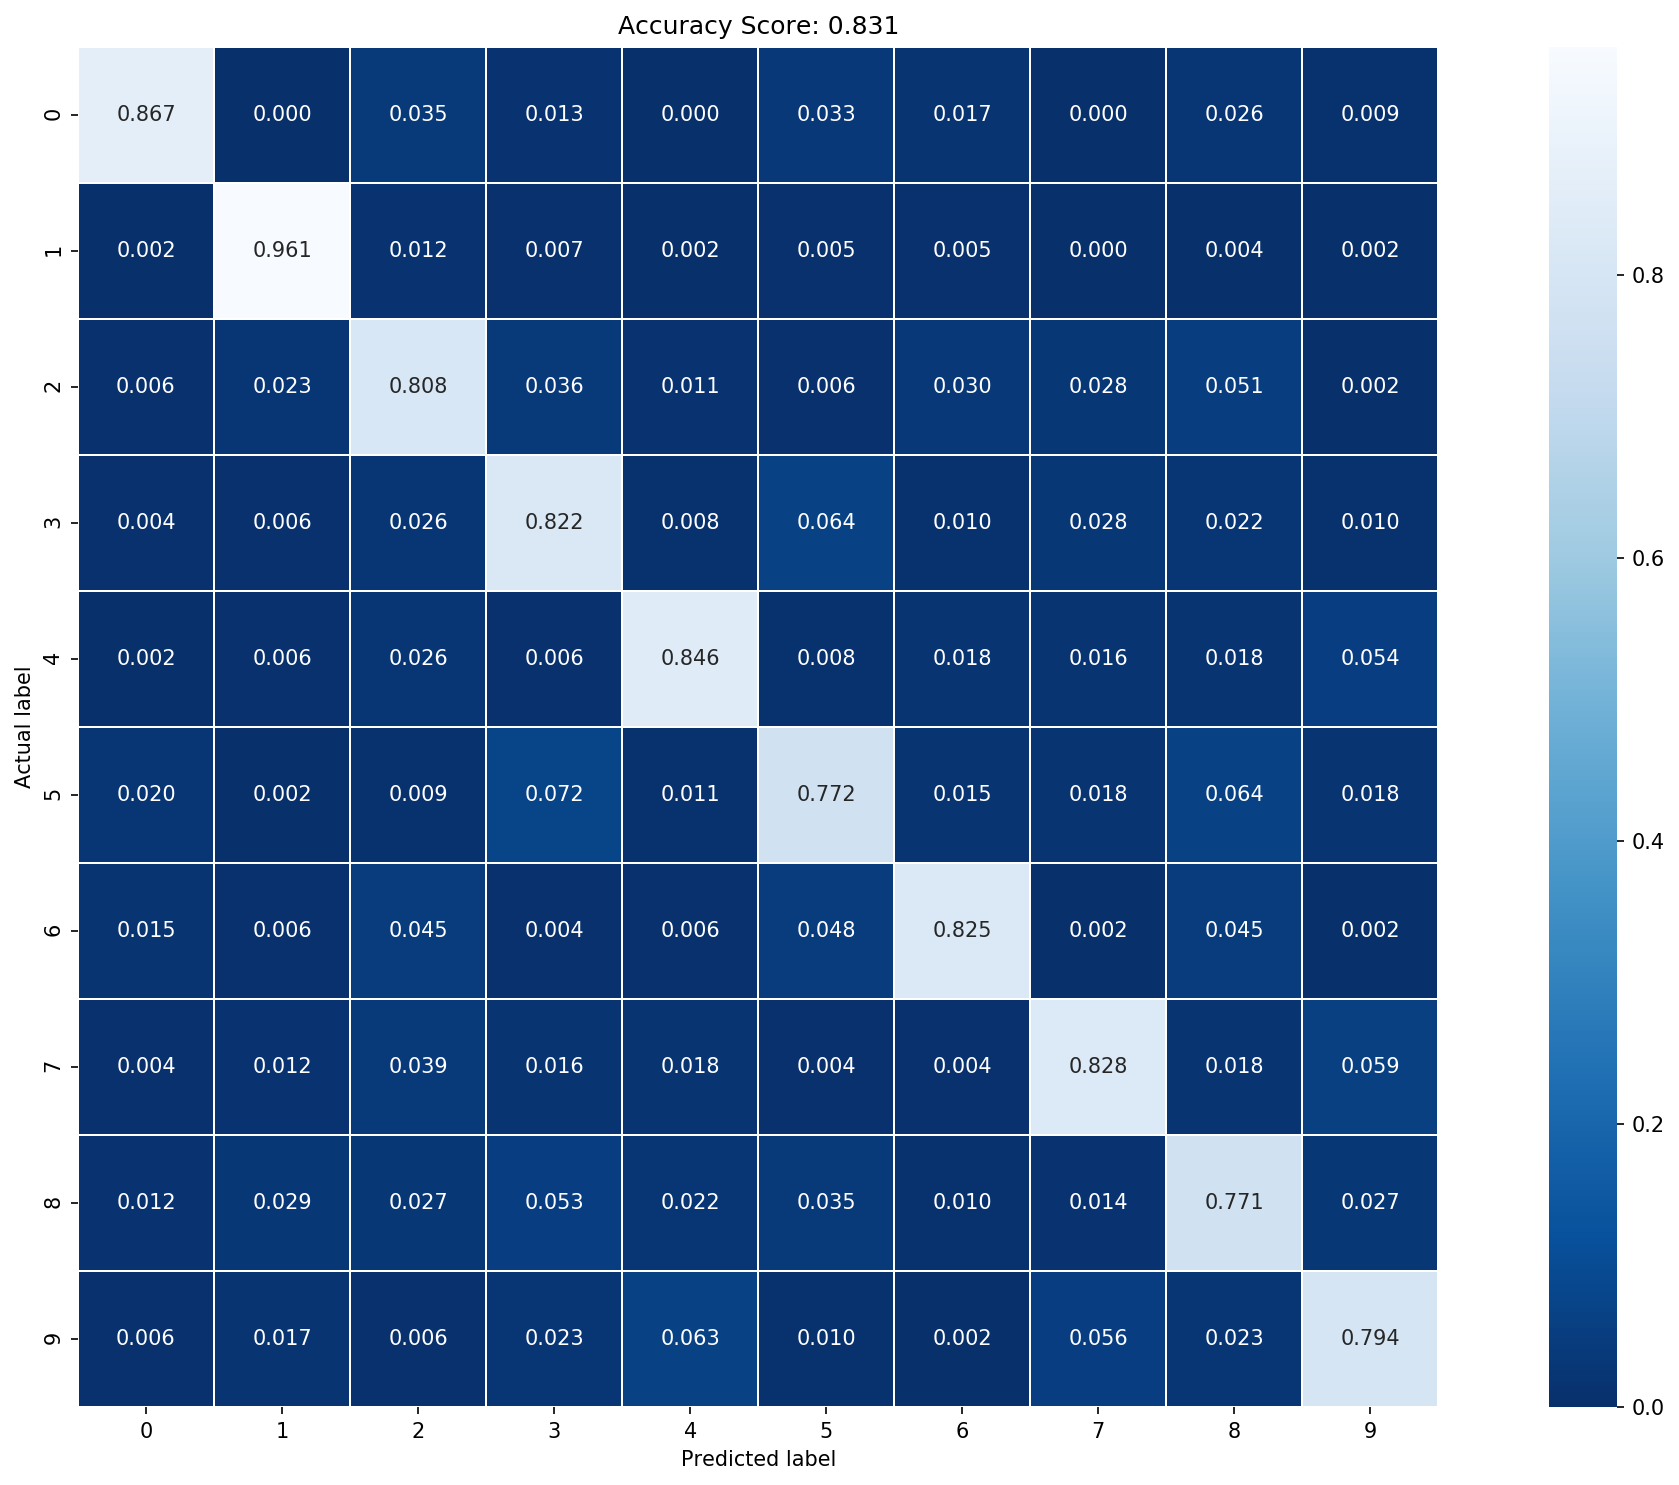

In [7]:
cm = metrics.confusion_matrix(y_test, y_pred) # compute confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # compute percentages

plt.figure(figsize=(15, 10), dpi= 150, facecolor='w', edgecolor='k')
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {:.3f}'.format(acc_score))
plt.tight_layout()

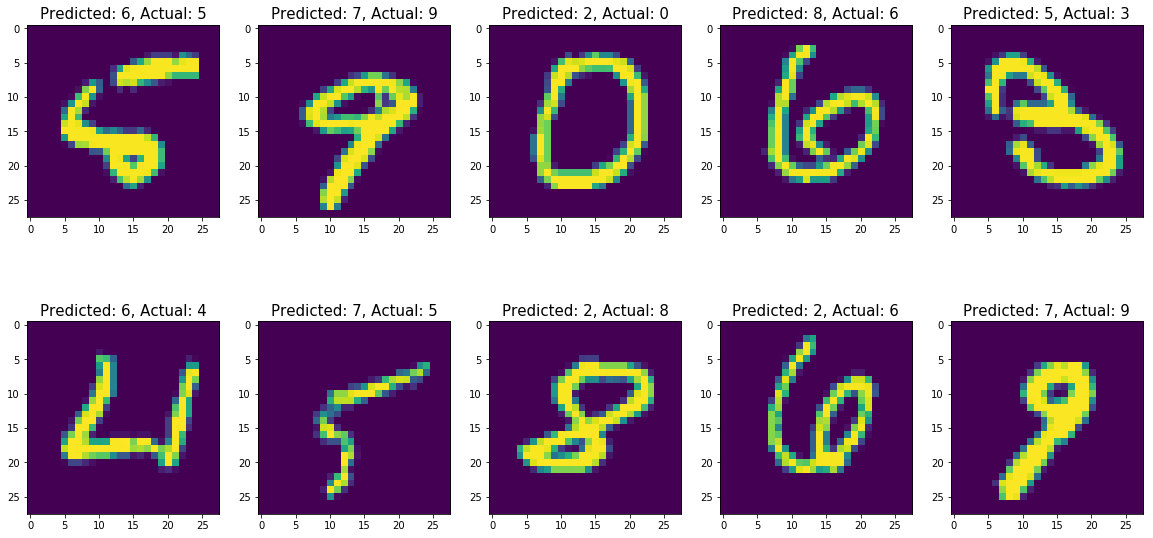

In [8]:
# Visualize misclassified images
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
    
plt.figure(figsize=(20,10))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0 : 10]):
    plt.subplot(2, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28, 28)))
    plt.title('Predicted: {}, Actual: {}'.format(int(y_pred[badIndex]), int(y_test[badIndex])), fontsize = 15)

## Regularized Logistic Regression

In [9]:
# [time consuming]
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'C': [0.01, 0.1, 1]}] # the tuned parameters C is the inverse of the regularization parameters
clf = GridSearchCV(LogisticRegression(penalty='l2', solver='lbfgs'), tuned_parameters, cv=10,
                   scoring='accuracy', n_jobs = -1)
clf.fit(X_train, y_train)

print("Best parameters set found on training set:", clf.best_params_['C'])

Best parameters set found on training set: 0.1


In [10]:
y_pred = clf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy score:", acc_score)

Accuracy score: 0.8786


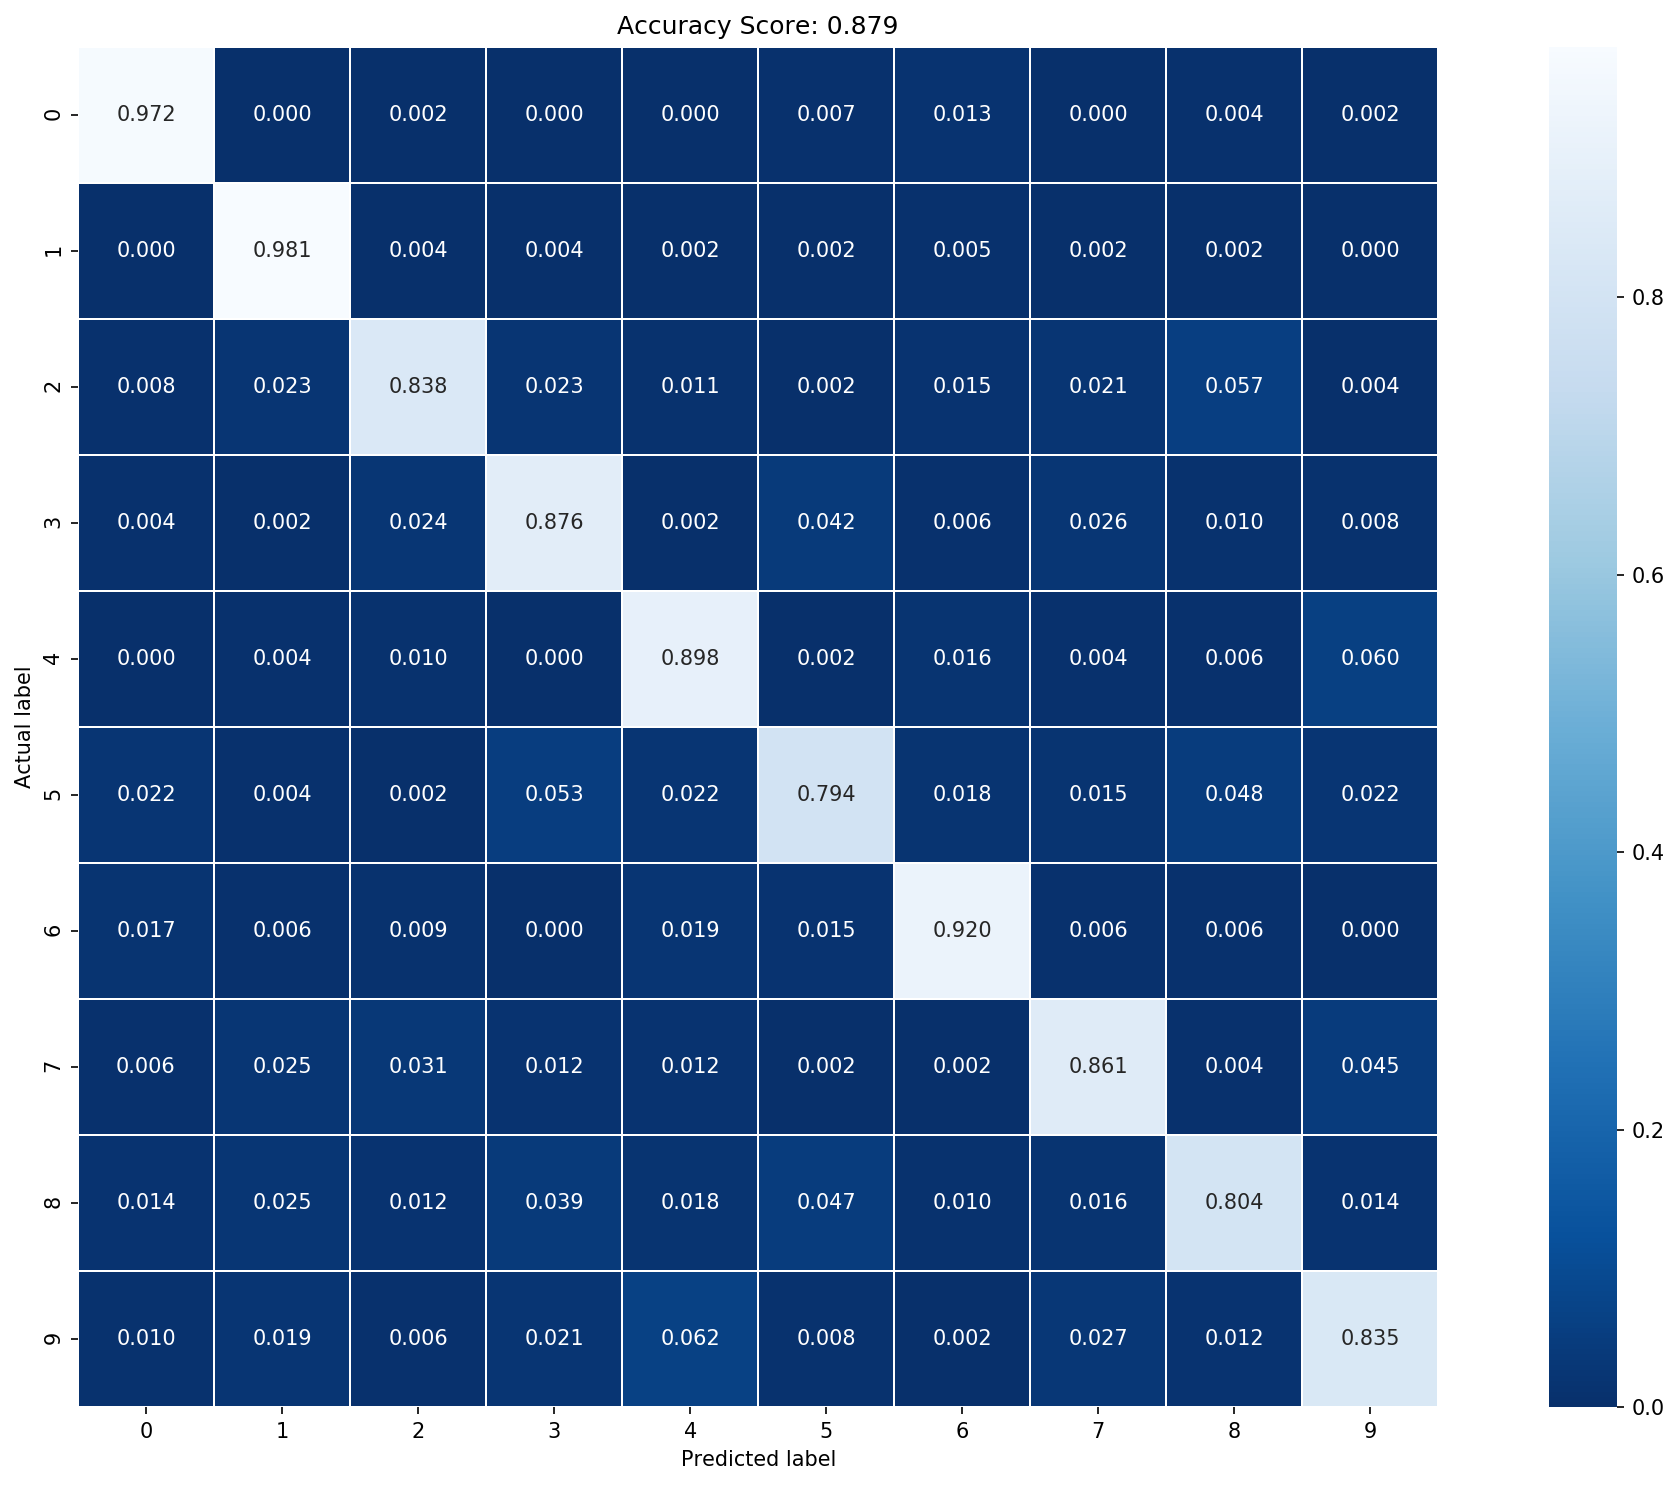

In [11]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(15, 10), dpi= 150, facecolor='w', edgecolor='k')
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {:.3f}'.format(acc_score))
plt.tight_layout()

## Multi-Layer Perceptron Neural Network(MLP)

![mlp.png](img/mlp.png)

In [12]:
# Reshaping the array to 4-dims so that it can work with the Keras API
X_train = X_train_copy.reshape(X_train_raw.shape[0], 28, 28, 1)
X_test = X_test_copy.reshape(X_test_raw.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')[0:Ntr] # select few samples
X_test = X_test.astype('float32')[0:Nte] # select few samples
y_train = y_train_raw[0:Ntr] # select few samples
y_test = y_test_raw[0:Nte] # select few samples
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255
print('Train shape:', X_train.shape)
print('Number of images in Train', X_train.shape[0])
print('Number of images in Test', X_test.shape[0])

model_mlp = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


Train shape: (10000, 28, 28, 1)
Number of images in Train 10000
Number of images in Test 5000


In [13]:
model_mlp.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # define MLP model

model_mlp.fit(X_train, y_train, epochs=10) # fit MLP

model_mlp.evaluate(X_test, y_test) # evaluate on test

Epoch 1/10
10000/10000 [==============================] - 2s 234us/step - loss: 0.4338 - acc: 0.8739
Epoch 2/10
10000/10000 [==============================] - 2s 211us/step - loss: 0.1939 - acc: 0.9436
Epoch 3/10
10000/10000 [==============================] - 2s 216us/step - loss: 0.1308 - acc: 0.9628
Epoch 4/10
10000/10000 [==============================] - 2s 218us/step - loss: 0.0959 - acc: 0.9744
Epoch 5/10
10000/10000 [==============================] - 2s 217us/step - loss: 0.0677 - acc: 0.9816
Epoch 6/10
10000/10000 [==============================] - 2s 213us/step - loss: 0.0482 - acc: 0.9869
Epoch 7/10
10000/10000 [==============================] - 2s 212us/step - loss: 0.0411 - acc: 0.9884
Epoch 8/10
10000/10000 [==============================] - 2s 218us/step - loss: 0.0287 - acc: 0.9923
Epoch 9/10
10000/10000 [==============================] - 2s 212us/step - loss: 0.0237 - acc: 0.9944
Epoch 10/10
5000/5000 [==============================] - 0s 45us/step


[0.20422339115142824, 0.9444]

## Convolutional Neural Network (CNN)

### CNN architecture
![cnn.png](img/cnn.png)

### Softmax
![softmax.jpg](img/softmax.jpg)

### Relu
![relu.png](img/relu.png)

In [14]:
# Reshaping the array to 4-dims so that it can work with the Keras API
X_train = X_train_copy.reshape(X_train_raw.shape[0], 28, 28, 1)
X_test = X_test_copy.reshape(X_test_raw.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')[0:Ntr] # select few samples
X_test = X_test.astype('float32')[0:Nte] # select few samples
y_train = y_train_raw[0:Ntr] # select few samples
y_test = y_test_raw[0:Nte] # select few samples
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255
print('Train shape:', X_train.shape)
print('Number of images in Train', X_train.shape[0])
print('Number of images in Test', X_test.shape[0])

# Creating a Sequential Model and adding the layers
model_cnn = Sequential()
model_cnn.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model_cnn.add(MaxPooling2D( pool_size=(2, 2)) )
model_cnn.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model_cnn.add(Dense(128, activation=tf.nn.relu))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(10, activation=tf.nn.softmax))


Train shape: (10000, 28, 28, 1)
Number of images in Train 10000
Number of images in Test 5000


In [15]:
model_cnn.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) # Define CNN model

model_cnn.fit(x=X_train, y=y_train, epochs=10) # fit CNN model

Epoch 1/10
10000/10000 [==============================] - 5s 472us/step - loss: 0.4434 - acc: 0.8670
Epoch 2/10
10000/10000 [==============================] - 4s 437us/step - loss: 0.2011 - acc: 0.9434
Epoch 3/10
10000/10000 [==============================] - 4s 441us/step - loss: 0.1308 - acc: 0.9623
Epoch 4/10
10000/10000 [==============================] - 4s 436us/step - loss: 0.0885 - acc: 0.9728
Epoch 5/10
10000/10000 [==============================] - 4s 441us/step - loss: 0.0666 - acc: 0.9803
Epoch 6/10
10000/10000 [==============================] - 4s 435us/step - loss: 0.0532 - acc: 0.9835
Epoch 7/10
10000/10000 [==============================] - 4s 434us/step - loss: 0.0367 - acc: 0.9892
Epoch 8/10
10000/10000 [==============================] - 4s 435us/step - loss: 0.0299 - acc: 0.9907
Epoch 9/10
10000/10000 [==============================] - 4s 434us/step - loss: 0.0252 - acc: 0.9927
Epoch 10/10
10000/10000 [==============================] - 4s 442us/step - loss: 0.0243 - a

In [16]:
model_cnn.evaluate(X_test, y_test)

5000/5000 [==============================] - 1s 131us/step


[0.1494881250962615, 0.956]

Predicted class: 5
True class: 5


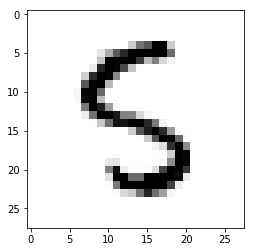

In [17]:
image_index = 1235
plt.imshow(X_test[image_index].reshape(28, 28), cmap='Greys')
pred = model_cnn.predict(X_test[image_index].reshape(1, 28, 28, 1))
print('Predicted class:', pred.argmax())
print('True class:', y_test[image_index])

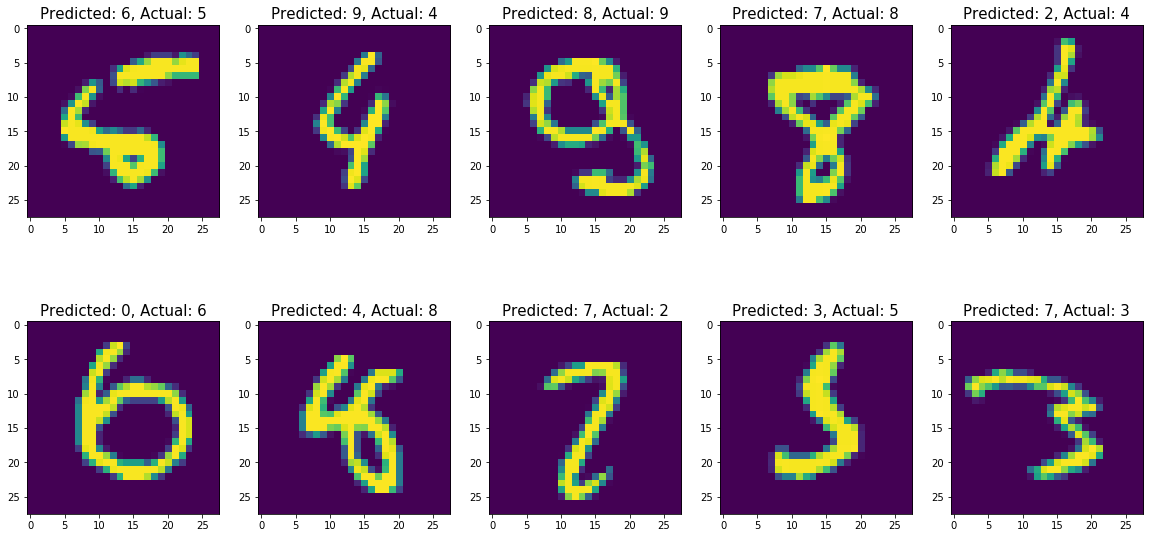

In [18]:
# Visualize misclassified images
index = 0
y_pred_proba = model_cnn.predict(X_test) # the output for each image is a vector of probabilities, for belonging to one of th 10 classes
y_pred = y_pred_proba.argmax(1) # get the index of most probable classe for each image

misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
    
plt.figure(figsize=(20,10))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0 : 10]):
    plt.subplot(2, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28, 28)))
    plt.title('Predicted: {}, Actual: {}'.format(int(y_pred[badIndex]), int(y_test[badIndex])), fontsize = 15)

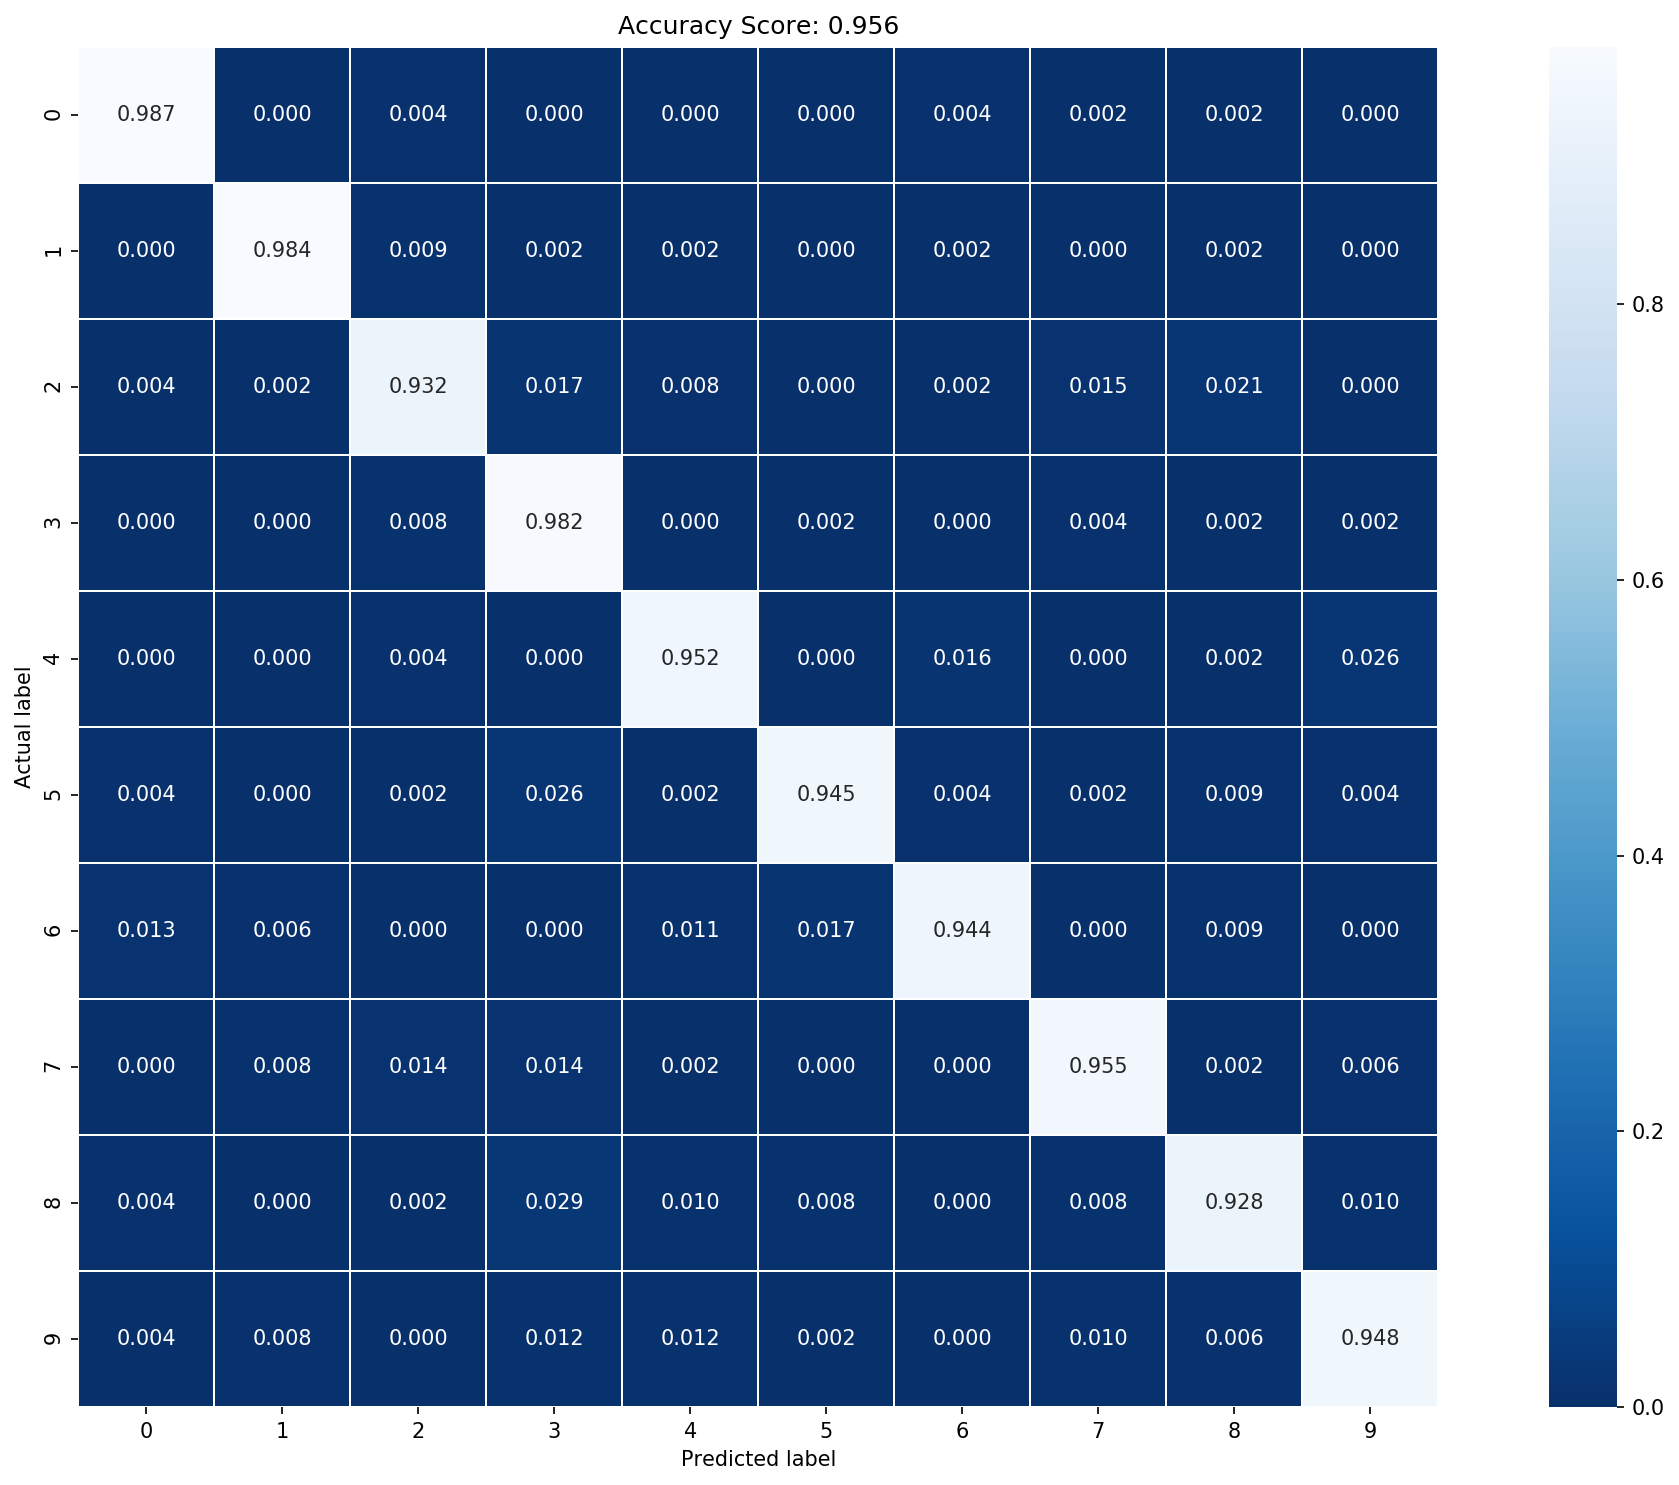

In [19]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

acc_score = accuracy_score(y_test, y_pred)

plt.figure(figsize=(15, 10), dpi= 150, facecolor='w', edgecolor='k')
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {:.3f}'.format(acc_score))
plt.tight_layout()

## Risorse

### Scikit-learn
Machine Learning in Python

Simple and efficient tools for data mining and data analysis
Accessible to everybody, and reusable in various contexts
Built on NumPy, SciPy, and matplotlib
Open source, commercially usable

 - http://scikit-learn.org/stable/auto_examples/index.html
 
 
 ### Tensorflow
 
 Deep learning framework by Google
 
 - https://www.tensorflow.org/tutorials/